# Exercise 9: Comparing data to predictions (20 points)

The exercise this week will allow you to gain some experience with comparing data to predictions, such as how well two variables are correlated.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-9-problems-1-3.ipynb` file (this file).
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail. 

## Problem 1: Linear data regression for detecting changing climate (8.5 points)

For this problem we will again use the NOAA climate data from previous exercises with a slight twist. As a reminder, you will be working with a climate data file from the [US National Oceanographic and Atmospheric Administration (NOAA) climate database](https://www.ncdc.noaa.gov/cdo-web/). In order to jump right into things, we have provided you with [a data file that has already been processed](data/seasonal-temps.csv) containing the means and standard deviations of seasonal temperatures (in Celsius) for winter and summer for the years 1966-2022. The first 5 lines of the data file are:

```
Year,Jan mean,Jan std,May temp,May std
1966,26.741935,0.478730,28.706452,1.139279
1967,26.119355,1.172865,29.219355,0.480569
1968,26.467742,0.813383,29.135484,0.526339
1969,26.100000,0.643428,29.016129,0.873726
```

Your task is to load this data and use a least squares regression to fit trendlines to the temperature data.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Reading in the data file for this exercise
- Properly converting the linear regressions formulas to a Python function and adding it to your `gdam_functions.py` script file from Exercise 8
- Calculating the least-squares regression lines for "summer" (May) and winter (January), for two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook **and script file** to your GitHub repository for this week's exercise

### Part 1: Reading the data file (1 point)

Your first task is to read in [the data file for this problem](data/seasonal-temps.csv).

- For this, you should use the Pandas `read_csv()` funtion to read in the data file [data/seasonal-temps.csv](data/seasonal-temps.csv) into the variable `data`
    - You do not need to skip any rows or specify an index column

In [1]:
# Import Pandas and NumPy
import pandas as pd
import numpy as np

# Defines a variable for the filename of the data
fp = "seasonal-temps-mac.csv"

#Reads datafile in a variable "data"
data = pd.read_csv(fp, sep = ',')

In [2]:
# This test should print the first row of the data file
print("First row of the DataFrame:\n", data.head(1))


First row of the DataFrame:
    Year   Jan mean  Jan std   May mean   May std
0  1966  26.741935  0.47873  28.706452  1.139279


### Part 2: A linear regression function (1.5 points)

Your next task in this problem is to create a function that calculates the slopes `B` and *y*-intercepts `A` for [unweighted linear regression lines](https://introqg-site.readthedocs.io/en/latest/notebooks/L2/least-squares.html). As you may recall from the lesson, `A` and `B` can be calculated as

\begin{equation}
  \Large
  A = \frac{\sum{x^2} \sum{y} - \sum{x} \sum{x y}}{\Delta}
\end{equation}

and

\begin{equation}
  \Large
  B = \frac{N \sum{x y} - \sum{x} \sum{y}}{\Delta},
\end{equation}

where

\begin{equation}
  \Large
  \Delta = N \sum{x^2} - \left(\sum{x} \right)^2.
\end{equation}

- Create a function `linregress` in your `gdam_functions.py` script file that returns the slope `B` and *y*-intercept `A` for a regression line for data `x` and `y`.
    - **NOTE**: You can return both `A` and `B` in the same `return` statement by separating the values with a comma
    - **NOTE**: You may need to restart your kernel in order for the new function to be imported. You may receive an `ImportError` otherwise.

In [3]:
# Import your new function below using the format "from gdam_functions import linregress"
from gdam_functions import linregress

In [4]:
# These visible tests with fake data should work
import numpy as np
from nose.tools import ok_, assert_equal

# Fake data for linregress tests
x1 = np.array([1.0, 2.0])
y1 = np.array([1.0, 2.0])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([1.0, 2.0, 2.7, 3.1, 4.7, 5.7])

# Fake line slopes, intercepts
a1, b1 = linregress(x1, y1)
a2, b2 = linregress(x2, y2)

# Print results
print(f"Slope and intercept for dataset 1: {b1:.4f} and {a1:.4f}.")
print(f"Slope and intercept for dataset 2: {b2:.4f} and {a2:.4f}.")

# Check that the linregress function works
assert_equal(a1, 0.0)
assert_equal(b1, 1.0)
assert_equal(round(a2, 4), 0.0799)
assert_equal(round(b2, 4), 0.975)

Slope and intercept for dataset 1: 1.0000 and 0.0000.
Slope and intercept for dataset 2: 0.9750 and 0.0799.


### Part 3: Calculating seasonal regression lines (1.5 points)

Now we can calculate the slopes and y-intercepts for our weather data to determine how summer and winter temperatures have varied over the observation period. We'll do this for two time ranges: The **entire observation period** and the **last 20 years (2003-2022)**.

- Use your `linregress` function to calculate the slopes and intercepts for summer and winter for the time periods mentioned above (the entire range of years, and 2003-2022).
You should name these values as follows:
    - Entire range of years: `A_winter` and `B_winter` for winter, `A_summer` and `B_summer` for summer
    - Last 20 years: `A_winter20` and `B_winter20` for winter, `A_summer20` and `B_summer20` for summer

**Hint**: In this problem, `x` will be your time data, and `y` will be your temperatures.

In [5]:
#variables: x1 = range of the entire data set y1a = winter temperatures for the entire range, y1b = summer temperatures for entire range
x1 = data['Year']
y1a = data['Jan mean']
y1b = data['May mean']

#defines a dataframe from 2003 to 2022
data20 = data.loc[data['Year'] >= 2003].reset_index()
print(data20.head())

##variables: x2 = range from 2003 to 2022, y2a= winter temperatures for the past 20 years, y2b = summer temperatures for the past 20 years

x2 = data20['Year']
y2a = data20['Jan mean']
y2b = data20['May mean']


   index  Year   Jan mean   Jan std   May mean   May std
0     34  2003  26.470968  0.640413  29.258065  1.008885
1     35  2004  26.474194  0.737097  28.900000  0.907377
2     36  2005  26.551613  0.665267  29.606452  0.402439
3     37  2006  26.851613  0.593223  28.838710  1.055044
4     38  2007  26.564516  0.904267  29.454839  0.859007


In [6]:
# Your calculations go below.
# Note: Replace both of the 'None' values with a single call of linregress() on each line
A_winter, B_winter = linregress(x1,y1a)
A_summer, B_summer = linregress(x1,y1b)
A_winter20, B_winter20 = linregress(x2,y2a)
A_summer20, B_summer20 = linregress(x2,y2b)

linregress(x1,y1a)

(np.float64(15.962116470759716), np.float64(0.005356066505009083))

In [7]:
###### This test should work
print(f"Winter (all years) slope: {B_winter:.5f}. Expected value: 0.00536.")
print(f"Winter (all years) intercept {A_winter:.1f}. Expected value: 16.0")


Winter (all years) slope: 0.00536. Expected value: 0.00536.
Winter (all years) intercept 16.0. Expected value: 16.0


In [8]:
# This test should work
print(f"Summer (last 20 years) slope: {B_summer20:.5f}. Expected value: 0.02437.")
print(f"Summer (last 20 years) intercept: {A_summer20:.1f}. Expected value: -19.8.")


Summer (last 20 years) slope: 0.02437. Expected value: 0.02437.
Summer (last 20 years) intercept: -19.8. Expected value: -19.8.


### Part 4: Plotting your results (4.5 points)

Your last coding task for this problem is to create some plots of your seasonal temperature data and their trendlines. An example of the types of plots you should create are below.
**Note**: You could create two separate plots for the different time periods, and not use subplots as shown in the example below.

![Temperature trends in Helsinki](img/temp-slopes.png)

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot with error bars showing the standard deviation in seasonal temperature
    - Also plot the regression lines for each season as well to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://geo-python-upd.readthedocs.io/en/latest/lessons/L9/exercise-9.html#general-hints-for-exercise-9) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the slope of the regression lines for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

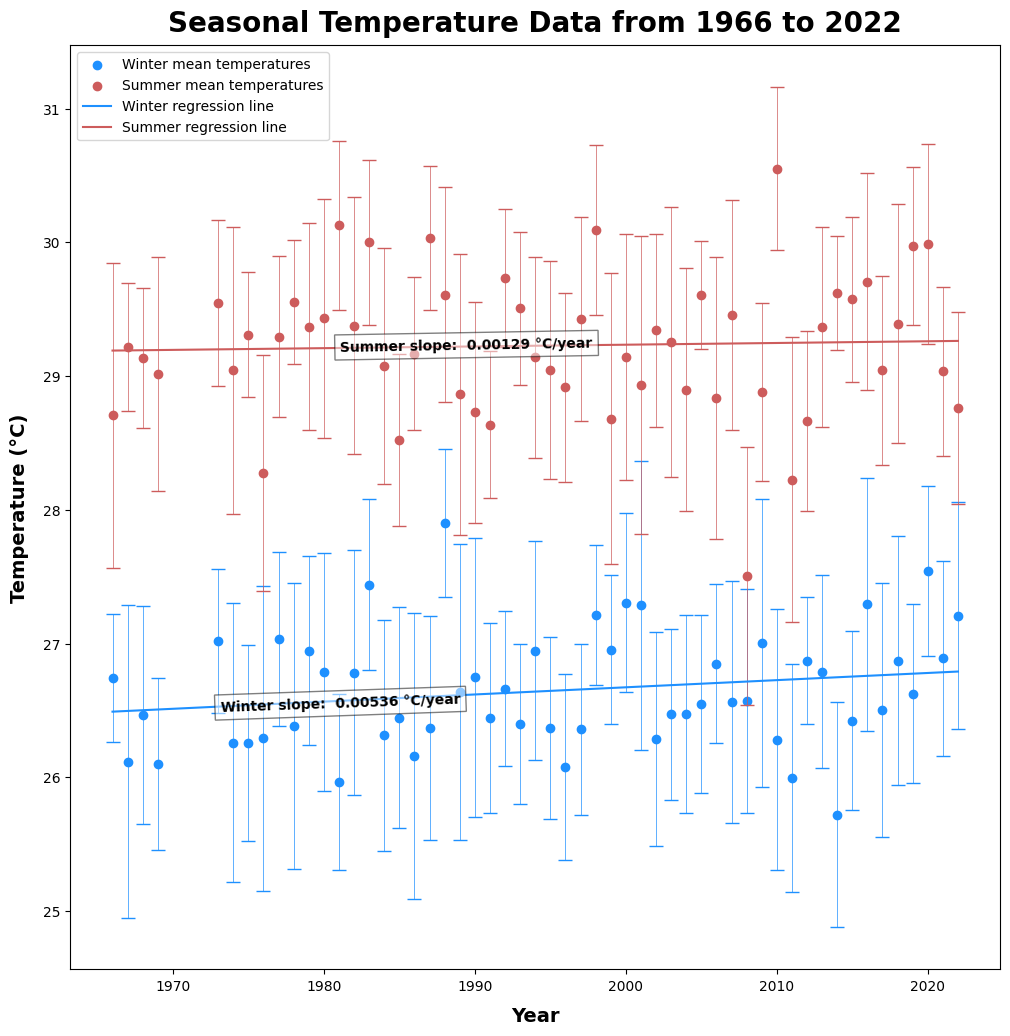

In [9]:
# Plot for all years goes here

#imports the matplotlib module
import matplotlib.pyplot as plt

#sets-up plot size
fig, ax1 = plt.subplots(1, 1, figsize = [12, 12])

#scatter plot for the winter and summer data
plt.scatter(
    x1, 
    y1a,
    color='dodgerblue',
    label='Winter mean temperatures'
)

plt.scatter(
    x1,
    y1b,
    color='indianred',
    label='Summer mean temperatures'
)

#error bars for the scatter plots
plt.errorbar(
    x1, 
    y1a, 
    yerr=data["Jan std"], 
    color='dodgerblue', 
    capsize=5, 
    elinewidth=0.5, 
    ls=' '
)
plt.errorbar(
    x1, 
    y1b, 
    yerr=data["May std"], 
    color='indianred', 
    capsize=5, 
    elinewidth=0.5, 
    ls=' '
)

#equation of the regression lines for the winter and summer data
y_winter = B_winter*data['Year'] + A_winter
y_summer = B_summer*data['Year'] + A_summer

#plots the linear regression lines for winter and summer data
plt.plot(
    x1,
    y_winter,
    color='dodgerblue',
    label='Winter regression line'
)

plt.plot(
    x1,
    y_summer,
    color='indianred',
    label='Summer regression line'
)

# Set axes labels, title, and texts for slopes
plt.xlabel('Year', fontsize = 14, labelpad = 10, weight = "bold")
plt.ylabel('Temperature (°C)', fontsize = 14, labelpad = 10, weight = "bold")
plt.title('Seasonal Temperature Data from 1966 to 2022', fontsize = 20, weight = "bold", pad = 10)
plt.figtext(0.35, 0.625, f'Summer slope: {B_summer: .5f} °C/year', rotation = 1, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")
plt.figtext(0.25, 0.325, f'Winter slope: {B_winter: .5f} °C/year', rotation = 2, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")


#Adds a plot legend in the upper left portion of the graph
plt.legend(loc = "upper left")

plt.show()

**Figure 1.** Annual average temperatures (°C) from 1966 to 2022 during the winter (January) and summer (May) with their respective regression lines.

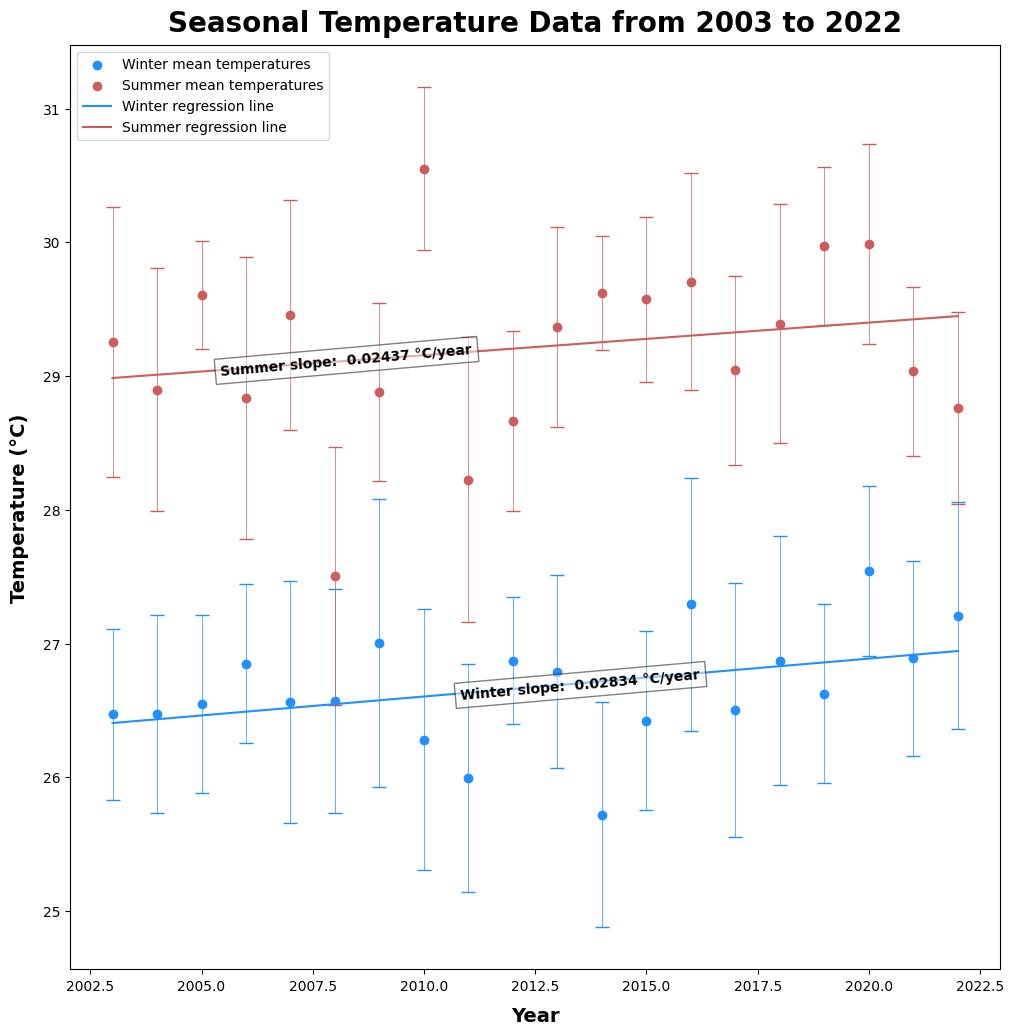

In [10]:
#Plot for the last 20 years goes here

#sets-up plot size
fig, ax = plt.subplots(1, 1, figsize = [12, 12])

#scatter plot for the winter and summer data
plt.scatter(
    x2, 
    y2a,
    color='dodgerblue',
    label='Winter mean temperatures'
)

plt.scatter(
    x2,
    y2b,
    color='indianred',
    label='Summer mean temperatures'
)

#error bars for the scatter plots
plt.errorbar(
    x2, 
    y2a, 
    yerr=data.loc[data['Year'] >= 2003, "Jan std"], 
    color='dodgerblue', 
    capsize=5, 
    elinewidth=0.5, 
    ls=' '
)
plt.errorbar(
    x2, 
    y2b, 
    yerr=data.loc[data['Year'] >= 2003, "May std"], 
    color='indianred', 
    capsize=5, 
    elinewidth=0.5, 
    ls=' '
)

#equation of the regression lines for the winter and summer data
y20_winter = B_winter20*(data.loc[data['Year']>=2003, 'Year']) + A_winter20
y20_summer = B_summer20*(data.loc[data['Year']>=2003, 'Year']) + A_summer20

#plots the linear regression lines for winter and summer data
plt.plot(
    x2,
    y20_winter,
    color='dodgerblue',
    label='Winter regression line'
)

plt.plot(
    x2,
    y20_summer,
    color='indianred',
    label='Summer regression line'
)

# Set axes labels, title, and texts for slopes
plt.xlabel('Year', fontsize = 14, labelpad = 10, weight = "bold")
plt.ylabel('Temperature (°C)', fontsize = 14, labelpad = 10, weight = "bold")
plt.title('Seasonal Temperature Data from 2003 to 2022', fontsize = 20, weight = "bold", pad = 10)
plt.figtext(0.25, 0.605, f'Summer slope: {B_summer20: .5f} °C/year', rotation = 5, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")
plt.figtext(0.45, 0.335, f'Winter slope: {B_winter20: .5f} °C/year', rotation = 5, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")

#Adds a plot legend in the upper left portion of the graph
plt.legend(loc = "upper left")

plt.show()

**Figure 2.** Annual average temperatures (°C) from 2003 to 2022 during winter (January) and summer (May) with their corresponding regression lines.

In [ ]:
# Plot for last 20 years goes here

ax2 = None

# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## Problem 2 - Linear correlation: Is a line a good fit for our data? (6 points)

In Problem 1 we used least squares regressions to calculate lines that best fit our data. One thing we did not consider, however, was whether a line was a suitable model for our data. To consider this another way, we could ask ourselves how well do our data plot on a line? This question will be the focus of Problem 2, where we will calculate the linear correlation coefficient $r$ to explore how well our data fall on a line. Notably, in doing this we will *not* consider the standard deviations in our seasonal temperatures, only the mean values for the different seasons.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the linear correlation coefficient formula to a Python function and adding it to your `gdam_functions.py` script file.
- Calculating linear corelation coefficients for summer and winter and for the two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A correlation coefficient function (1.5 points)

As we have seen in this week's lesson, the correlation coefficient $r$ can be used to determine how well two variables are linearly correlated with one another. In other words, how well does a line relate the two. Mathematically, we can define the correlation coefficient $r$ as

\begin{equation}
  \Large
  r = \frac{\sum{\left(x_{i} - \bar{x} \right)\left(y_{i} - \bar{y} \right)}}{\sqrt{\sum{\left(x_{i} - \bar{x} \right)^2} \sum{\left(y_{i} - \bar{y} \right)^2}}},
\end{equation}

where $x_{i}$ is the $i$th value along the $x$-axis, $\bar{x}$ is the mean of the values on the $x$-axis, and similarly for the values of $y$.

Your task in this part of the problem is to make a function for calculating $r$.

- Create a function `pearson()` in your `gdam_functions.py` script file that returns the correlation coefficient $r$ between two variables `x` and `y`

In [11]:
from gdam_functions import pearson

In [12]:
# Import your new function below using the format "from introqg_functions import pearson"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [12]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data for pearson tests
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([1.0, 2.0, 2.1])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([5.7, 4.2, 3.6, 5.4, 2.0, 1.0])

# Fake correlation coefficients
r1 = pearson(x1, y1)
r2 = pearson(x2, y2)

# Print results
print(f"Correlation coefficient for dataset 1: {r1:.4f}.")
print(f"Correlation coefficient for dataset 2: {r2:.4f}.")

# Check that the pearson function works
assert_equal(round(r1, 4), 0.9042)
assert_equal(round(r2, 4), -0.8156)

Correlation coefficient for dataset 1: 0.9042.
Correlation coefficient for dataset 2: -0.8156.


### Part 2: Calculating correlation coefficients (1.5 points)

Next, we can calculate the correlation coefficients for our weather data.

- Calculate correlation coefficients for the summer and winter and for both time ranges (the entire range of years, and 2003-2022) using your `pearson()` function.
You should name these values as follows:
    - Entire range of years: `r_winter` for winter and `r_summer` for summer
    - Last 20 years: `r_winter20` for winter, `r_summer20` for summer

In [13]:
#variables: x3 = range of the entire data set y3a = winter temperatures for the entire range, y3b = summer temperatures for entire range
x3 = data['Year']
y3a = data['Jan mean']
y3b = data['May mean']

#defines a dataframe from 2003 to 2022
data20b = data.loc[data['Year'] >= 2003].reset_index()
print(data20b.head())

##variables: x4 = range from 2003 to 2022, y4a= winter temperatures for the past 20 years, y4b = summer temperatures for the past 20 years

x4 = data20b['Year']
y4a = data20b['Jan mean']
y4b = data20b['May mean']



   index  Year   Jan mean   Jan std   May mean   May std
0     34  2003  26.470968  0.640413  29.258065  1.008885
1     35  2004  26.474194  0.737097  28.900000  0.907377
2     36  2005  26.551613  0.665267  29.606452  0.402439
3     37  2006  26.851613  0.593223  28.838710  1.055044
4     38  2007  26.564516  0.904267  29.454839  0.859007


In [14]:
r_winter = pearson(x3, y3a)
r_summer = pearson(x3, y3b)
r_winter20 = pearson(x4, y4a)
r_summer20 = pearson(x4, y4b)


In [15]:
# This test should work
print(f"Your winter (all years) correlation coefficient: {r_winter:.4f}. Expected value: 0.1966.")


Your winter (all years) correlation coefficient: 0.1966. Expected value: 0.1966.


In [16]:
# This test should work
print(f"Your summer (last 20 years) correlation coefficient: {r_summer20:.4f}. Expected value: 0.2144.")


Your summer (last 20 years) correlation coefficient: 0.2144. Expected value: 0.2144.


### Part 3: Plotting your results, round 2 (3 points)

Now we can generate a pair of plots showing the data along with the calculated $r$ values.

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot **without** error bars for the standard deviation in seasonal temperature
    - Also include the regression lines for each season from Problem 1 to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 8
- Include axis labels, a title and a legend for each plot, as well as text displaying the correlation coefficients for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

In [ ]:
# Plot for all years goes here

ax3 = None

# YOUR CODE HERE
raise NotImplementedError()

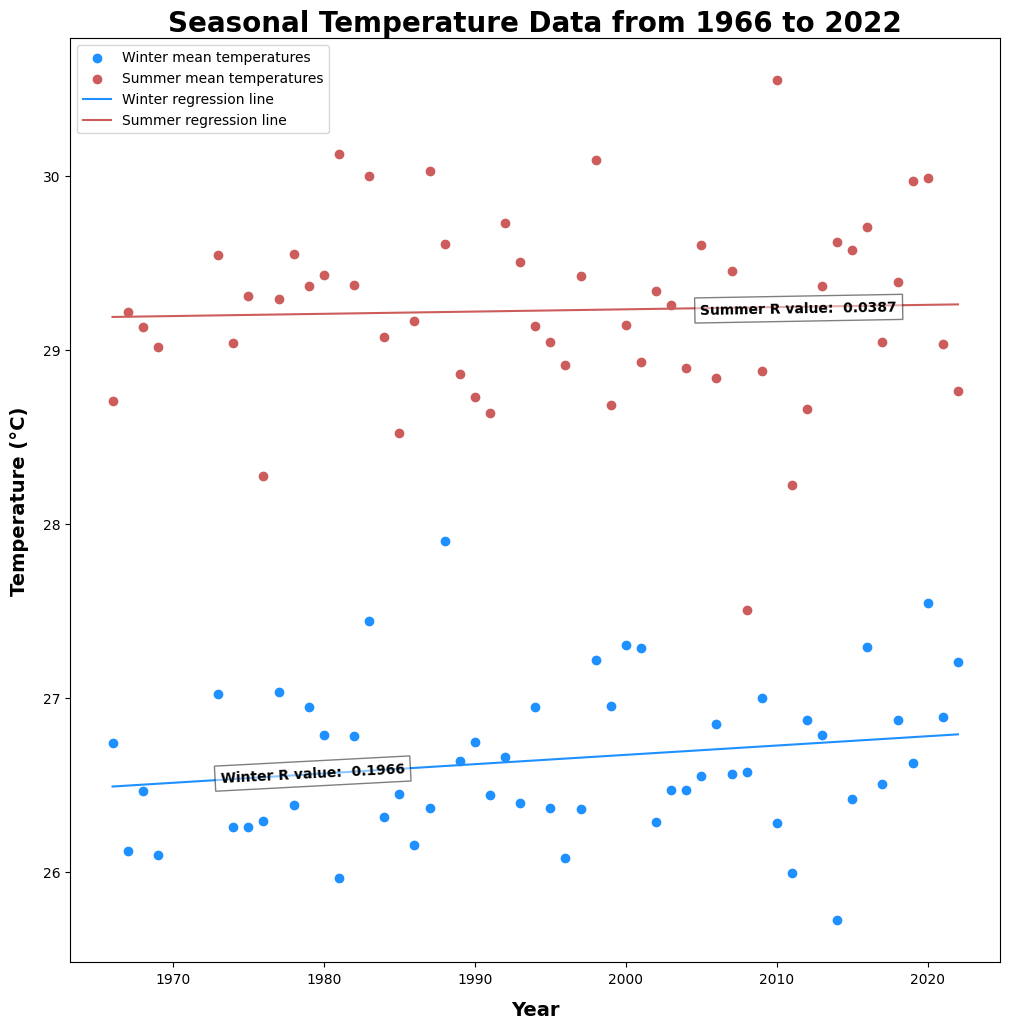

In [17]:
#Plot for all years goes here

#sets-up plot size
fig, ax3 = plt.subplots(1, 1, figsize = [12, 12])

#scatter plot for the winter and summer data
plt.scatter(
    x3, 
    y3a,
    color='dodgerblue',
    label='Winter mean temperatures'
)

plt.scatter(
    x3,
    y3b,
    color='indianred',
    label='Summer mean temperatures'
)


#equation of the regression lines for the winter and summer data
y_winter = B_winter*data['Year'] + A_winter
y_summer = B_summer*data['Year'] + A_summer

#plots the linear regression lines for winter and summer data
plt.plot(
    x3,
    y_winter,
    color='dodgerblue',
    label='Winter regression line'
)

plt.plot(
    x3,
    y_summer,
    color='indianred',
    label='Summer regression line'
)

# Set axes labels, title, and texts for slopes
plt.xlabel('Year', fontsize = 14, labelpad = 10, weight = "bold")
plt.ylabel('Temperature (°C)', fontsize = 14, labelpad = 10, weight = "bold")
plt.title('Seasonal Temperature Data from 1966 to 2022', fontsize = 20, pad = 5, weight = "bold")
plt.figtext(0.65, 0.65, f'Summer R value: {r_summer: .4f}', rotation = 1, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")
plt.figtext(0.25, 0.260, f'Winter R value: {r_winter: .4f}', rotation = 3, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")
#Adds a plot legend in the upper left portion of the graph
plt.legend(loc = "upper left")

plt.show()

**Figure 3.** Annual average temperature (°C) during winter (January) and summer (May) from 1966 to 2022 with their corresponding R values.

YOUR ANSWER HERE

In [ ]:
# Plot for the last 20 years goes here

ax4 = None

# YOUR CODE HERE
raise NotImplementedError()

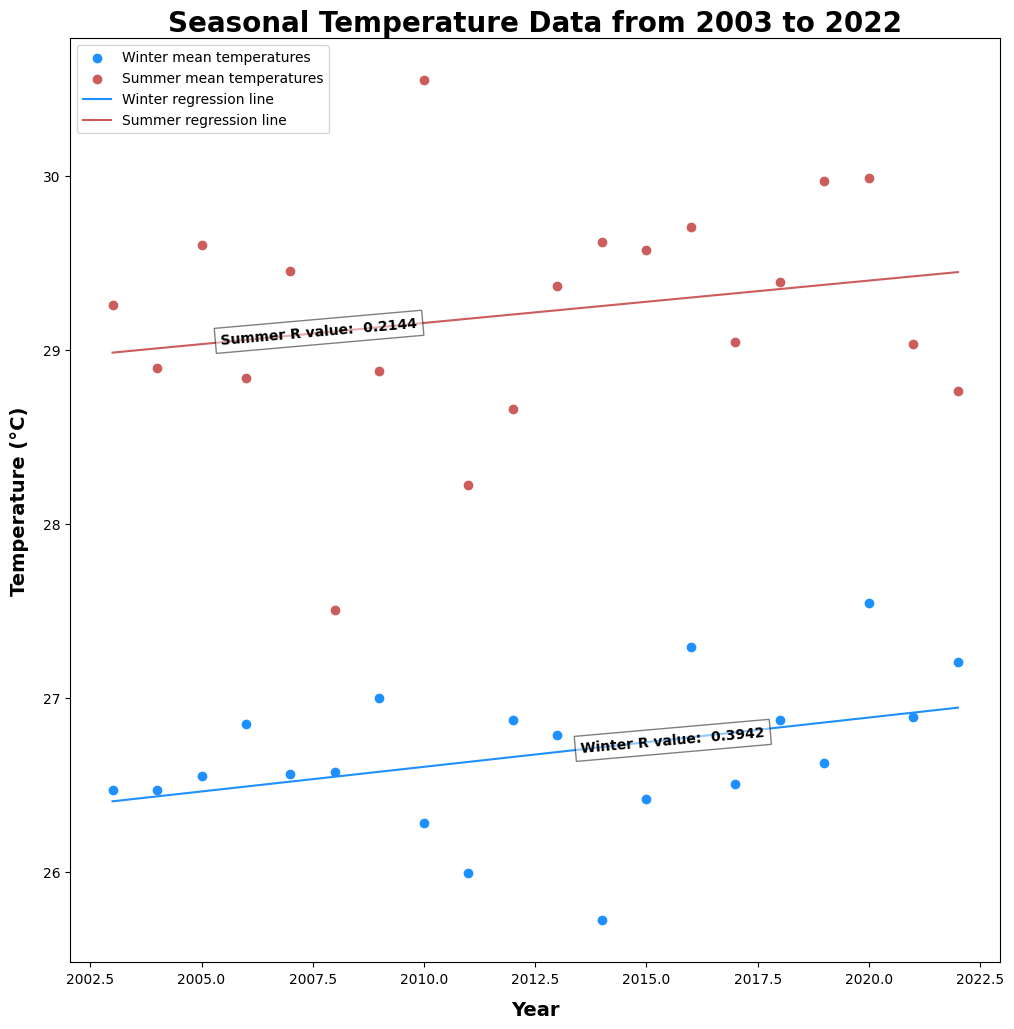

In [18]:
#Plot for the last 20 years goes here

#sets-up plot size
fig, ax4 = plt.subplots(1, 1, figsize = [12, 12])

#scatter plot for the winter and summer data
plt.scatter(
    x4, 
    y4a,
    color='dodgerblue',
    label='Winter mean temperatures'
)

plt.scatter(
    x4,
    y4b,
    color='indianred',
    label='Summer mean temperatures'
)


#equation of the regression lines for the winter and summer data
y20_winter = B_winter20*(data.loc[data['Year']>=2003, 'Year']) + A_winter20
y20_summer = B_summer20*(data.loc[data['Year']>=2003, 'Year']) + A_summer20

#plots the linear regression lines for winter and summer data
plt.plot(
    x4,
    y20_winter,
    color='dodgerblue',
    label='Winter regression line'
)

plt.plot(
    x4,
    y20_summer,
    color='indianred',
    label='Summer regression line'
)

# Set axes labels, title, and texts for slopes
plt.xlabel('Year', fontsize = 14, labelpad = 10, weight = "bold")
plt.ylabel('Temperature (°C)', fontsize = 14, labelpad = 10, weight = "bold")
plt.title('Seasonal Temperature Data from 2003 to 2022', fontsize = 20, pad = 5, weight = "bold")
plt.figtext(0.25, 0.625, f'Summer R value: {r_summer20: .4f}', rotation = 5, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")
plt.figtext(0.55, 0.285, f'Winter R value: {r_winter20: .4f}', rotation = 5, bbox=dict(facecolor='white', alpha=0.5), weight = "bold")
#Adds a plot legend in the upper left portion of the graph
plt.legend(loc = "upper left")

plt.show()

**Figure 4.** Annual average temperatures (°C) during winter (January) and summer (May) from 2003 to 2022 with their corresponding R values.

YOUR ANSWER HERE

## Problem 3: Calculating a goodness-of-fit (3.5 points)

The final part of the exercise this week is to calculate a goodness-of-fit for the lines fit to the data in Problem 1. The idea here is to consider that we have an expected value of the temperature based on our least-squares regressions, and we can see how well those expected values fit within the standard deviation of the seasonal temperatures.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the goodness-of-fit formula to a Python function and adding that function to your `gdam_functions.py` script file
- Calculating goodness-of-fit values for summer and winter and for the two different time periods
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A goodness-of-fit function (1.5 points)

We can start by creating a function to calculate the goodness-of-fit. For this, you can use the reduced chi-squared equation,

\begin{equation}
  \Large
  \chi^{2} = \frac{1}{N} \sum \frac{(O_{i} - E_{i})^{2}}{\sigma_{i}^2}
\end{equation}

where $N$ is the number of ages, $O_{i}$ is the $i$th observed value, $E_{i}$ is the $i$th expected value, and $\sigma_{i}$ is the $i$th standard deviation.

For this part you should:

- Create a function called `chi_squared` in your `gdam_functions.py` script file that can be used to calculate the reduced chi-squared value

In [19]:
from gdam_functions import chi_squared

In [ ]:
# Import your new function below using the format "from introqg_functions import chi_squared"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
raise NotImplementedError()

In [20]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data
obs1 = np.array([1.1, 2.9, 2.6, 3.5, 5.7, 2.8])
exp1 = np.array([1.5, 2.4, 3.6, 1.5, 6.7, 2.6])
std1 = np.array([0.5, 1.4, 0.6, 1.5, 0.7, 1.0])

obs2 = np.array([1.8, 2.3, 2.2, 3.9, 5.5, 2.4])
exp2 = np.array([1.2, 2.0, 3.9, 1.7, 6.1, 2.9])
std2 = np.array([0.2, 0.4, 1.6, 2.5, 0.5, 0.3])

# Fake goodness-of-fit values
cs1 = chi_squared(obs1, exp1, std1)
cs2 = chi_squared(obs2, exp2, std2)

# Print results
print(f"Goodness-of-fit for dataset 1: {cs1:.4f}.")
print(f"Goodness-of-fit for dataset 2: {cs2:.4f}.")

# Check that the chi-squared function works
assert_equal(round(cs1, 4), 1.2340)
assert_equal(round(cs2, 4), 2.6139)

Goodness-of-fit for dataset 1: 1.2340.
Goodness-of-fit for dataset 2: 2.6139.


### Part 2: Calculating goodness-of-fit (2 points)

Next, we can calculate the goodness-of-fit for each point along our line and the corresponding observed seasonal mean temperaure. We will do this by first creating arrays of expected temperature values for each season and time period, and then calculating the goodness-of-fit between those expected values and the observed temperatures.

- Create 4 arrays that contain the expected temperature value for each year based on the equation for the regression lines calculated in Problem 1
    - The variables `exp_winter` and `exp_summer` can be used for all years, while `exp_winter20` and `exp_summer20` can be used for the last 20 years
- Calculate the goodness-of-fit between the expected values and the observed mean seasonal temperatures
    - The variables `gof_winter` and `gof_summer` can be used for all years, while `gof_winter20` and `gof_summer20` can be used for the last 20 years

In [21]:
#variables: y5a = winter temperatures for the entire range, y5b = summer temperatures for entire range, sigma_winter = standard deviation
#in the winter, sigma_summer = standard deviation in the summer
y5a = data['Jan mean']
y5b = data['May mean']
sigma_winter = data['Jan std']
sigma_summer = data['May std']

#defines a dataframe from 2003 to 2022
data20c = data.loc[data['Year'] >= 2003].reset_index()
print(data20c.head())

##variables: y6a= winter temperatures for the past 20 years, y6b = summer temperatures for the past 20 years, sigma_winter20 = standard deviation
#in the winter, sigma_summer20 = standard deviation in the summer 
y6a = data20c['Jan mean']
y6b = data20c['May mean']
sigma_winter20 = data20c['Jan std']
sigma_summer20 = data20c['May std']

   index  Year   Jan mean   Jan std   May mean   May std
0     34  2003  26.470968  0.640413  29.258065  1.008885
1     35  2004  26.474194  0.737097  28.900000  0.907377
2     36  2005  26.551613  0.665267  29.606452  0.402439
3     37  2006  26.851613  0.593223  28.838710  1.055044
4     38  2007  26.564516  0.904267  29.454839  0.859007


In [22]:
# Expected temperatures based on least-squares regression in Problem 1
exp_winter = B_winter*data['Year'] + A_winter
exp_summer = B_summer*data['Year'] + A_summer 
exp_winter20 = B_winter20*(data20c['Year']) + A_winter20
exp_summer20 = B_summer20*(data20c['Year']) + A_summer20

# Goodness-of-fit values
gof_winter = chi_squared(y5a, exp_winter, sigma_winter)
gof_summer = chi_squared(y5b, exp_summer, sigma_summer)
gof_winter20 = chi_squared(y6a, exp_winter20, sigma_winter20)
gof_summer20 = chi_squared(y6b, exp_summer20, sigma_summer20)

In [23]:
# This test should work
print(f"My mean expected winter temperature: {np.mean(exp_winter):.4f}. Expected value: 26.6489.")

My mean expected winter temperature: 26.6490. Expected value: 26.6489.


In [52]:
# This test should work
print(f"My mean expected winter temperature: {mean(exp_winter):.4f}. Expected value: 26.6489.")


NameError: name 'mean' is not defined

In [24]:
# This test should work
print(f"My summer (all years) goodness-of-fit: {gof_summer:.4f}. Expected value: 0.5692.")


My summer (all years) goodness-of-fit: 0.5692. Expected value: 0.5692.


In [25]:
# Run this cell to print all of your calculated goodness-of-fit values
print(f"My winter goodness-of-fit values:\n    All years:     {gof_winter:.4f}\n    Last 20 years: {gof_winter20:.4f}\n")
print(f"My summer goodness-of-fit values:\n    All years:     {gof_summer:.4f}\n    Last 20 years: {gof_summer20:.4f}")

My winter goodness-of-fit values:
    All years:     0.3890
    Last 20 years: 0.2378

My summer goodness-of-fit values:
    All years:     0.5692
    Last 20 years: 0.8161


## Summary questions for Exercise 2 (2 points; 0.5 points each)

Answer the questions below in a few sentences.

1. Based on the least-squares regressions calculated in Problem 1, how have summer and winter temperatures changed in Mactan over the time 1966-2022? Is the trend similar for both seasons? What about when you consider only the data over the last 20 years? Do you have any first-hand experience that relates to these temperature trends? If so, what?
2. Based on the calculation of the correlation coefficients in Problem 2, how well does it seem the data are fit by a line? Are there any significant differences between seasons or time periods in the calculated $r$ values?
3. Looking at the goodness-of-fit values calculated in Problem 3, how well does it appear the data are fit by a regression line? Do you see differences between seasons ot time period considered? 
4. Comparing the calculated $\chi^{2}$ values from Problem 3 to the $r$ values in Problem 2, what differences do you see in the numbers between seasons and/or time periods? Can you think of reasons why the $r$ and $\chi^{2}$ values might differ in terms of their relative values in each season/time period? How are the $r$ and $\chi^{2}$ values different in terms of what they measure?

1. Based on the least-squares regressions calculated in Problem 1, how have summer and winter temperatures changed in Mactan over the time 1966-2022? Is the trend similar for both seasons? What about when you consider only the data over the last 20 years? Do you have any first-hand experience that relates to these temperature trends? If so, what?

    - An upward trend can be observed in the summer and winter temperatures in Mactan over the entire period of observation. This suggests that temperature does rise from 1966 to 2022. If you observe the slopes, we can see that this increase in temperature is very gradual since the slopes are close to 0. However, we can see that the slope appears sharper when you only consider data from the past 20 years. This suggests that the temperature in Mactan is rising faster over the past two decades compared to the increase in temperature during the 20th century. We can experience this personally as we can feel that it is much warmer currently compared to the temperatures even 10 years ago.
      
2. Based on the calculation of the correlation coefficients in Problem 2, how well does it seem the data are fit by a line? Are there any significant differences between seasons or time periods in the calculated $r$ values?

   - Except for the winter data for all of the years, the data appears to fit a straight line. However, since the values are not very close to 0, we cannot say that the number of years and the temperature have a very strong correlation. The r value for the winter data is closer to zero and thus we can say that winter temperature increase and year have little to no correlation. A higher correlation can be observed in summer temperatures, suggesting that the increase in temperature in Mactan can be observed better during summertime.
     
3. Looking at the goodness-of-fit values calculated in Problem 3, how well does it appear the data are fit by a regression line? Do you see differences between seasons or time period considered?

    - Since the chi-squares are less than 1, the regression line appear to be a good fit to the dataset. Data obtained from the summer have higher chi-square values compared to winter data. There is also a difference if you consider all of the data or if you only considered data from the past 20 years. This suggests that the summer data predicted by the regression line is not as close to the values of the dataset provided.
      
4. Comparing the calculated $\chi^{2}$ values from Problem 3 to the $r$ values in Problem 2, what differences do you see in the numbers between seasons and/or time periods? Can you think of reasons why the $r$ and $\chi^{2}$ values might differ in terms of their relative values in each season/time period? How are the $r$ and $\chi^{2}$ values different in terms of what they measure?

   - There are significant differences in the chi-square and R values of the dataset. The positive r values of summer data suggests that there is a positive linear correlation between the increase in temperature as well as the period. This means that temperature has increased over the time period. The high chi-square values of summer data, on the other hand, suggest that the data set is farther away from the regression line compared to the winter data. Pearson's r is used to check for linear correlation between two variables while the Chi-square is used to determine how close or how near the dataset are to the regression line.